In [7]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import datetime as dt


Requirement already up-to-date: gspread in /usr/local/lib/python3.6/dist-packages (3.6.0)


In [9]:
ratings_df = pd.read_csv("data/movie_lense/ratings.csv")

SpreadsheetNotFound: ignored

In [ ]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit = 's')

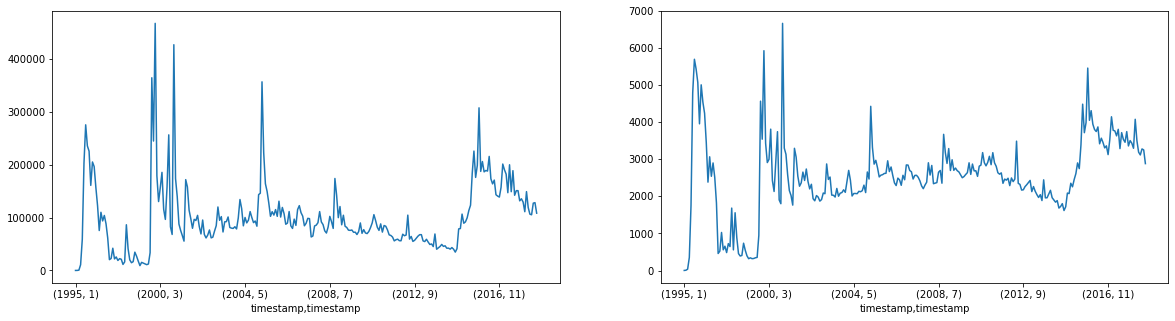

In [ ]:
# exploring trends in user rating count and unique user counts
ratings_df.sort_values(by = ['timestamp'])
fig, axs = plt.subplots(1,2, figsize = (20,5))
#ratings_df.groupby([ratings_df['timestamp'].dt.year]).userId.count().plot(ax=axs[0])
#ratings_df.groupby([ratings_df['timestamp'].dt.year]).userId.nunique().plot(ax=axs[1])
ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.count().plot(ax=axs[0])
ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.nunique().plot(ax=axs[1])

In [ ]:
#numRatings_df.plot()
numRatings_df = ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.count()
uniqueUsers_df = ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.nunique()

# lol i got fed up with pandas so I did it this way
vector_X = []
vector_X.append("1995-1")

for i in range(1996, 2018):
    for j in range(1, 13):
        vector_X.append(str(i)+"-"+str(j))
        
vector_X.remove("1997-8")

for i in range (1, 10):
    vector_X.append("2018-"+str(i))

vector_y_numRatings = np.array(numRatings_df)#.reshape(len(numRatings_df), 1)
vector_y_uniqueUsers = np.array(uniqueUsers_df)#.reshape(len(uniqueUsers_df), 1)
vector_X = np.array(vector_X)

vector_X_time = pd.to_datetime(vector_X, format='%Y-%m', errors='ignore') #pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')
vector_X = np.array(vector_X_time.map(dt.datetime.toordinal))
vector_X = vector_X.reshape(len(vector_X), 1)

#uniqueUsers_df = ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.nunique()

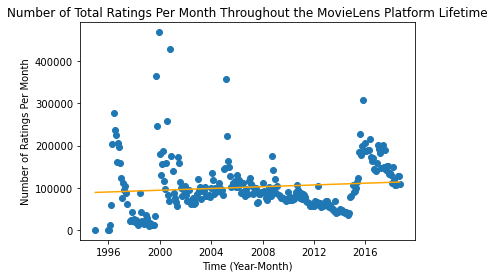

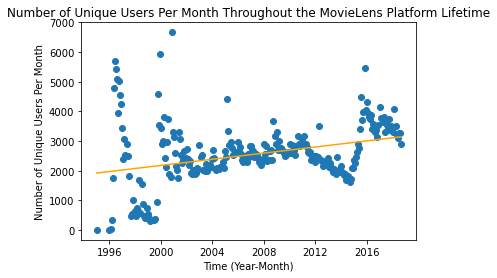

In [ ]:
#vector_y_uniqueUsers
regr_numRatings = LinearRegression().fit(vector_X, vector_y_numRatings)
pred_numRatings = regr_numRatings.predict(vector_X)
plt.scatter(vector_X_time, vector_y_numRatings)
plt.plot(vector_X, pred_numRatings, color='orange')
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Ratings Per Month")
plt.title("Number of Total Ratings Per Month Throughout the MovieLens Platform Lifetime")
plt.show()


plt.figure()
regr_uniqueUsers = LinearRegression().fit(vector_X, vector_y_uniqueUsers)
pred_uniqueUsers = regr_uniqueUsers.predict(vector_X)
plt.scatter(vector_X_time, vector_y_uniqueUsers)
plt.plot(vector_X, pred_uniqueUsers, color='orange')
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Unique Users Per Month")
plt.title("Number of Unique Users Per Month Throughout the MovieLens Platform Lifetime")
plt.show()

In [ ]:
uniqueUsers_df
numRatings_df

timestamp  timestamp
1995       1                 4
1996       1                66
           2               588
           3             10748
           4             58960
                         ...  
2018       5            106666
           6            105522
           7            127534
           8            128470
           9            108572
Name: userId, Length: 273, dtype: int64

In [ ]:
movies_df = pd.read_csv("data/movie_lense/movies.csv")
genometags_df = pd.read_csv("data/movie_lense/genome-tags.csv")
genomescores_df = pd.read_csv("data/movie_lense/genome-scores.csv")
tags_df = pd.read_csv("data/movie_lense/tags.csv")
oscars_df = pd.read_csv("")
netflix_df = pd.read_csv("data/netflix_titles.csv")

In [ ]:
movies_df.head(5)

,movieId,title,genres,release
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


In [ ]:
pattern = r'(\([0-9][0-9][0-9][0-9]\))'
a = movies_df['title'].str.contains(pattern)
movies_df['release'] = movies_df['title'].str.extract(pattern, expand=True)
movies_df['release'] = movies_df['release'].str.replace('(', "")
movies_df['release'] = movies_df['release'].str.replace(')', "")
movies_df['title'] = movies_df['title'].str.replace(pattern, "")
movies_df['release'] = pd.to_datetime(movies_df['release'], format = '%Y')
movies_df['release'] = movies_df['release'].dt.year
movies_df['title'] = movies_df['title'].str.rstrip()

D:\Anaconda\Anaconda_install_directory\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
netflix_df_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_rerelease_df = netflix_df_movies.merge(movies_df, on = ['title', 'title'])

netflix_rerelease_df = netflix_rerelease_df.drop(columns = ['type', 'show_id', 'release'])
# not using show_id becasue the movie Shakar had two different show Ids
netflix_rerelease_df = netflix_rerelease_df.drop_duplicates(subset=['director', 'release_year', 'duration', 'title'], keep='last')
netflix_rerelease_df

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movieId,genres
0,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,177545,Comedy
2,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,185925,Drama
3,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",130083,Action|Crime|Drama|Thriller
8,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,175951,Drama
13,Love,"Kabir Bhatia, Titien Wattimena","Acha Septriasa, Darius Sinathrya, Fauzi Baadil...",Indonesia,"November 30, 2018",2008,TV-PG,120 min,"Dramas, International Movies, Romantic Movies","In Jakarta, five couples of varying ages and b...",175951,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
2253,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,"April 1, 2017",2016,TV-MA,81 min,"Dramas, International Movies",After spending much of his adult life in New Y...,184615,Comedy|Drama
2254,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...,163775,Action|Thriller
2255,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,164298,Comedy|Drama
2256,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,164298,Comedy|Drama


In [ ]:
netflix_rerelease_df.to_csv('data/movielens_netflix_releases.csv',index=False)

In [ ]:
a = netflix_rerelease_df.drop_duplicates(subset=['director', 'release_year', 'duration', 'title'])
b = netflix_rerelease_df.drop_duplicates(subset=['show_id'])
df_test = pd.concat([a,b])
df_test.drop_duplicates(keep=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movieId,genres
886,81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,134342,Action|Drama


In [1]:
oscars_df = pd.read_csv("data/the_oscar_award.csv")
oscars_movies_df = oscars_df.drop_duplicates(subset=['film'], keep="first")
oscars_movies_df['title'] = oscars_movies_df['film']
oscars_movies_df

NameError: ignored

In [ ]:
common_movies = oscars_df_movies.merge(movies_df, on = ['title', 'title'])